In [17]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="darkgrid")

# Load datasets
df1 = pd.read_csv("C:\\Users\\arjav\\Documents\\jupyter\\Unemployment in India.csv")
df2 = pd.read_csv(r"C:\Users\arjav\Documents\jupyter\Unemployment_Rate_upto_11_2020.csv")



# View first 5 rows of both datasets
print("Dataset 1:")
print(df1.head(), "\n")

print("Dataset 2:")
print(df2.head())


Dataset 1:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural   

Dataset 2:
           Region         Date  Frequency   Estimated Une

In [18]:
# Dataset 1 info
print("\n--- Dataset 1 Info ---")
print(df1.info())

# Dataset 2 info
print("\n--- Dataset 2 Info ---")
print(df2.info())

# Check for nulls
print("\n--- Missing Values in Dataset 1 ---")
print(df1.isnull().sum())

print("\n--- Missing Values in Dataset 2 ---")
print(df2.isnull().sum())



--- Dataset 1 Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB
None

--- Dataset 2 Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    

In [20]:
# Strip extra spaces from column names and date values
df2.columns = df2.columns.str.strip()
df2['Date'] = df2['Date'].str.strip()

# Convert 'Date' to datetime (day-month-year)
df2['Date'] = pd.to_datetime(df2['Date'], format="%d-%m-%Y")

# Rename columns for simplicity
df2.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
}, inplace=True)

# Preview cleaned dataframe
df2.head()


,Region,Date,Frequency,Unemployment_Rate,Employed,Labour_Participation_Rate,Region.1,longitude,latitude
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74
3,Andhra Pradesh,2020-04-30,M,20.51,11336911,33.10,South,15.9129,79.74
4,Andhra Pradesh,2020-05-31,M,17.43,12988845,36.46,South,15.9129,79.74


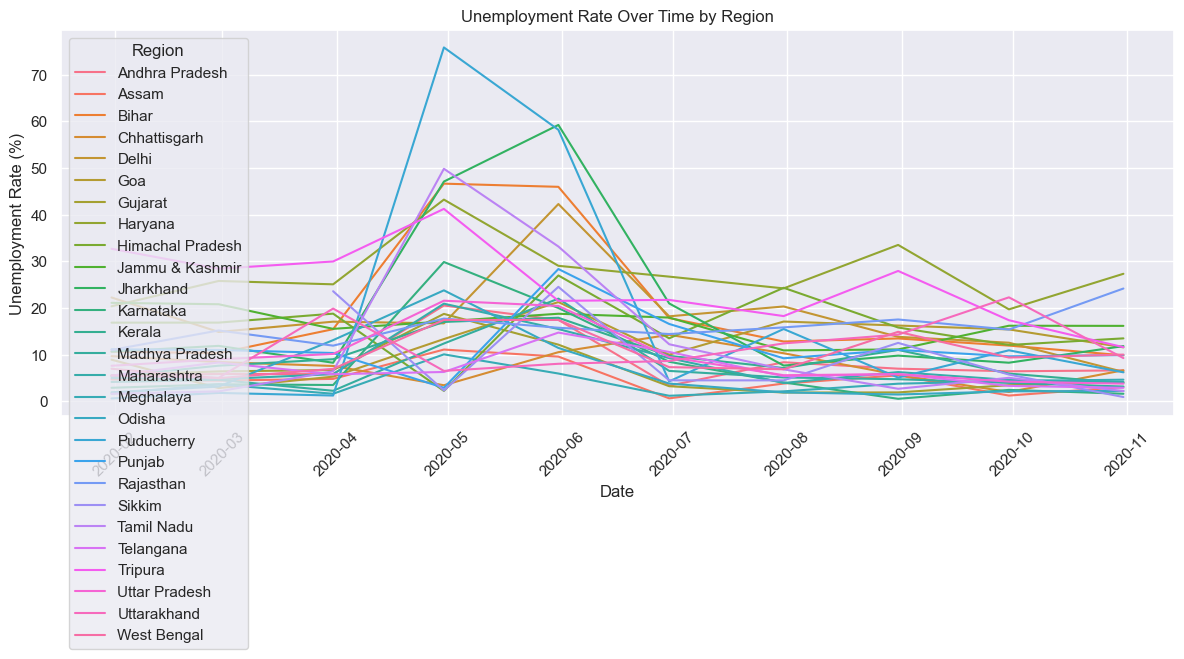

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df2, x='Date', y='Unemployment_Rate', hue='Region')
plt.title("Unemployment Rate Over Time by Region")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\arjav\AppData\Local\Temp\ipykernel_2888\3624867647.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')


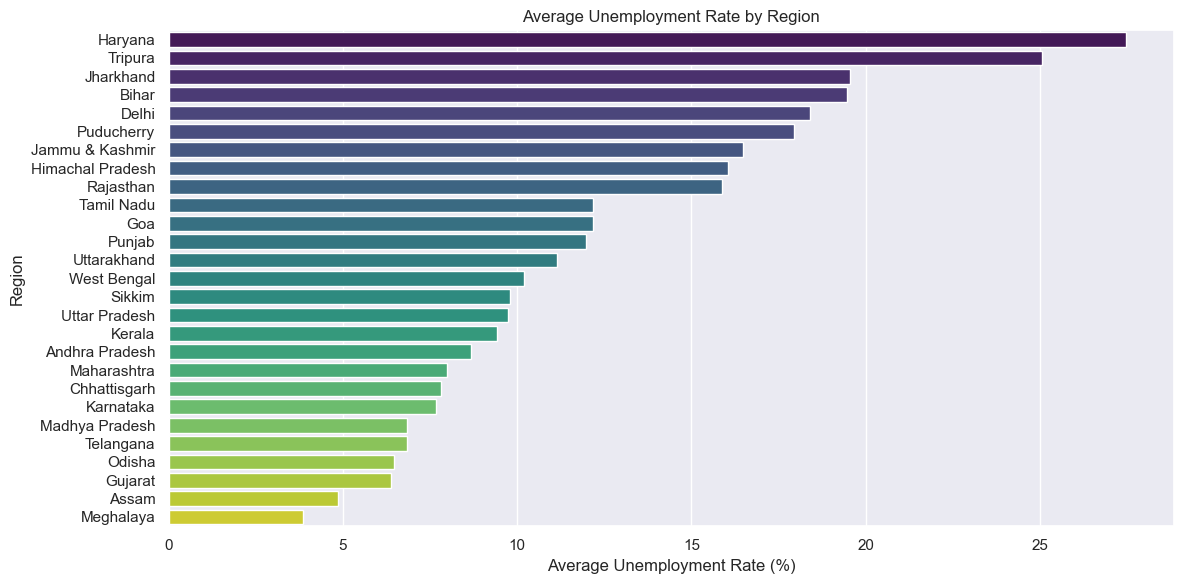

In [22]:
plt.figure(figsize=(12, 6))
region_avg = df2.groupby('Region')['Unemployment_Rate'].mean().sort_values(ascending=False)
sns.barplot(x=region_avg.values, y=region_avg.index, palette='viridis')
plt.title("Average Unemployment Rate by Region")
plt.xlabel("Average Unemployment Rate (%)")
plt.ylabel("Region")
plt.tight_layout()
plt.show()


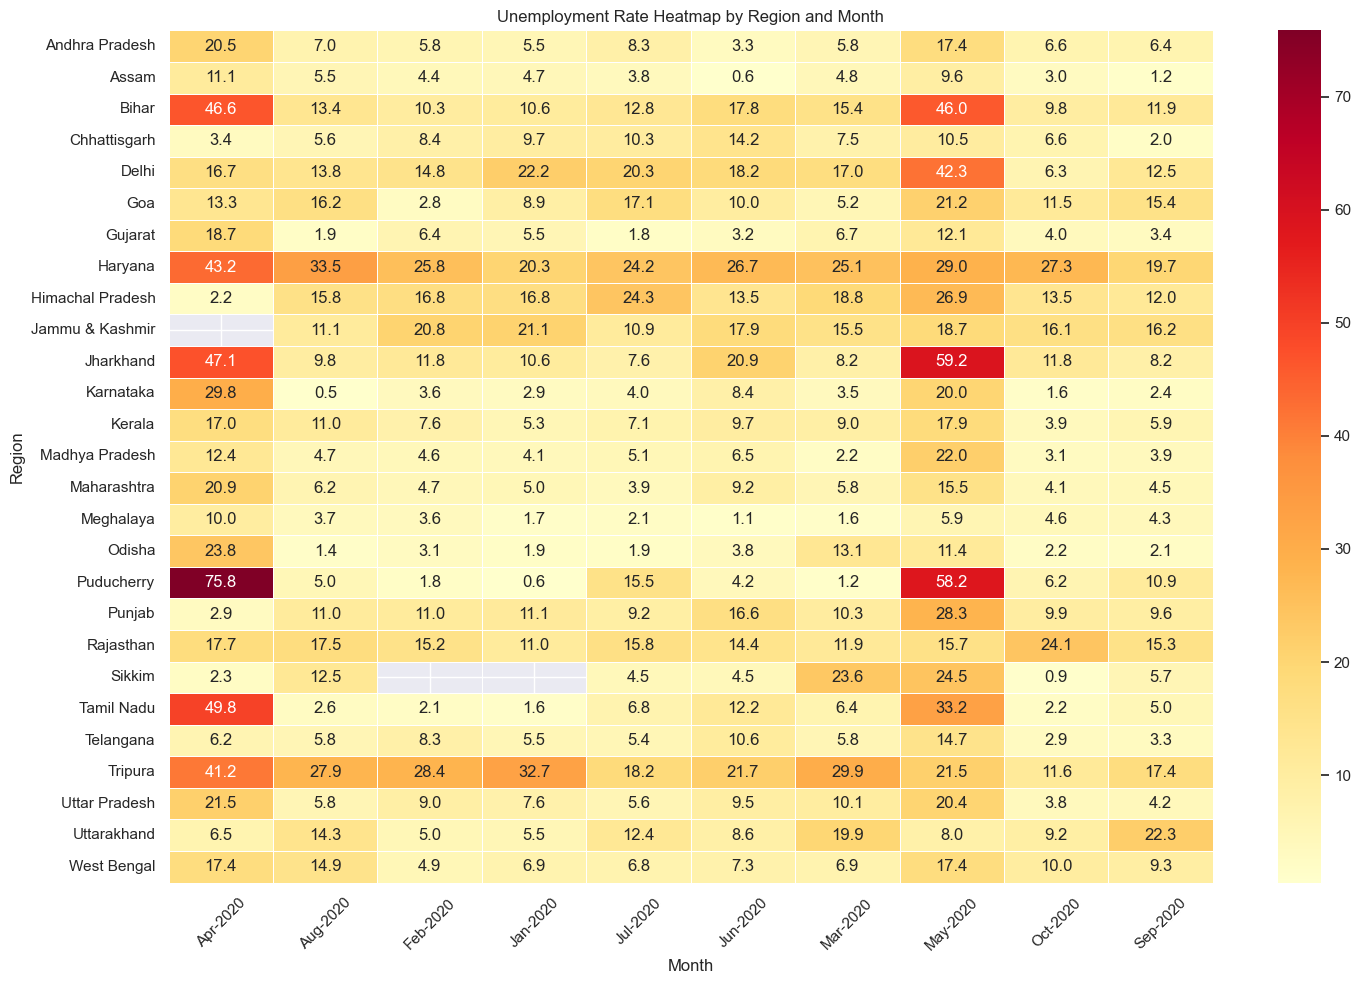

In [23]:
df2['Month'] = df2['Date'].dt.strftime('%b-%Y')  # Create a Month-Year column
pivot = df2.pivot_table(values='Unemployment_Rate', index='Region', columns='Month')

plt.figure(figsize=(15, 10))
sns.heatmap(pivot, annot=True, fmt=".1f", cmap="YlOrRd", linewidths=.5)
plt.title("Unemployment Rate Heatmap by Region and Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


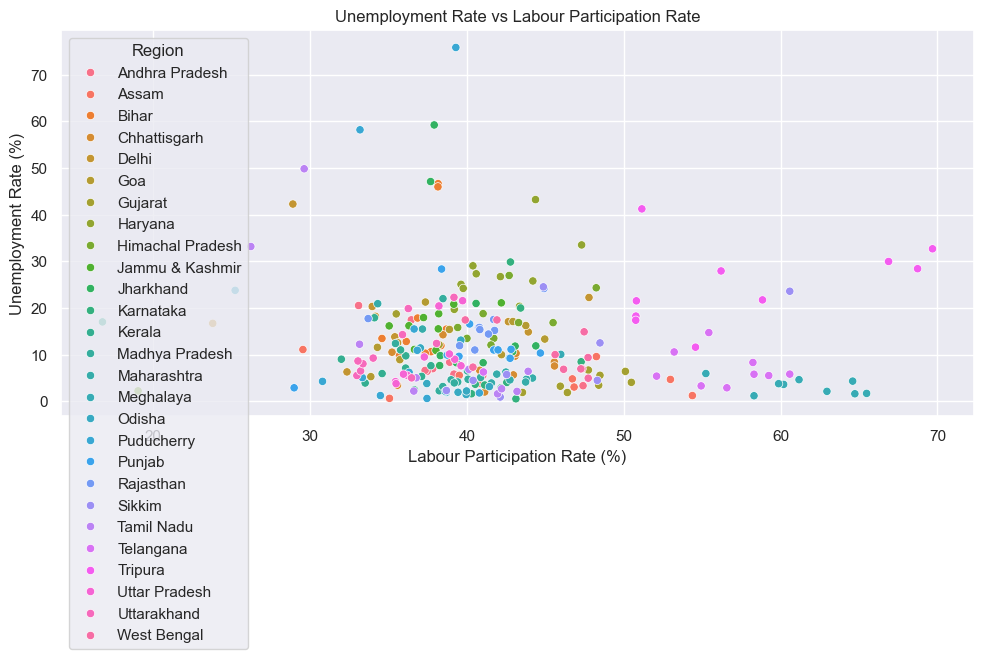

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Labour_Participation_Rate', y='Unemployment_Rate', hue='Region')
plt.title("Unemployment Rate vs Labour Participation Rate")
plt.xlabel("Labour Participation Rate (%)")
plt.ylabel("Unemployment Rate (%)")
plt.tight_layout()
plt.show()


In [30]:
import plotly.io as pio
pio.renderers.default = 'notebook'  # or 'iframe' or 'plotly_mimetype' for other environments


In [31]:
pio.renderers.default = 'iframe_connected'


In [33]:
import plotly.express as px

# Create interactive map
fig = px.scatter_geo(
    df2,
    lat='latitude',
    lon='longitude',
    color='Unemployment_Rate',
    hover_name='Region',
    size='Unemployment_Rate',
    animation_frame=df2['Date'].dt.strftime('%Y-%m'),
    projection="natural earth",
    title="Unemployment Rate in India (Monthly Animated Map)",
    color_continuous_scale="Reds",
    size_max=30,
)

fig.update_geos(
    showcountries=True, countrycolor="Black",
    showland=True, landcolor="LightGrey",
    showocean=True, oceancolor="LightBlue",
    fitbounds="locations"
)

fig.update_layout(
    geo=dict(scope='asia'),
    margin=dict(l=0, r=0, t=50, b=0)
)

fig.show()
